In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
raw_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = raw_df.copy()
df.drop(columns=['id'],inplace=True)
print(df.describe())
print('------------------------------------------------------------------')
print(df.info())


               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000  
---------------------------------------------------------------

### Observation:
* There is null values in 'bmi'.

In [17]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
num_of_nan = 0
for i in(df['bmi']):
    if np.isnan(i):
        num_of_nan += 1
print(f"Number of nan in 'bmi' column is {num_of_nan}")

Number of nan in 'bmi' column is 201


I want to see if I can drop these rows if their "stroke" label is 0 (because there are many non_stroke data)

In [30]:
num_of_nan = 0
num_of_stroke = 0
for i in range(len(df)):
    if np.isnan(df['bmi'][i]) and df['stroke'][i]==1:
        num_of_nan += 1
    if df['stroke'][i] == 1:
        num_of_stroke += 1
print(f"Number of cases where 1.stroke and 2.nan found in 'bmi' is {num_of_nan}")
print(f"Total number of stroke cases is {num_of_stroke}")

Number of cases where 1.stroke and 2.nan found in 'bmi' is 40
Total number of stroke cases is 249


* The above numbers show that we can not drop the rows with nan in 'bmi' columnn, because 40 out of 249 stroke cases have nan in bmi.
* Instead, we will use pandas fillna to fill the nans.

In [33]:
# fill the nan in bmi with mean value of the rest in bmi columnn
df=df.fillna(np.mean(df['bmi']))

### Our data contains numerical and categorical values, we will analysis them seperately.

In [34]:
df_num = df[['age', 'avg_glucose_level', 'bmi']]
df_cat = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
             'work_type', 'Residence_type', 'smoking_status', 'stroke']]

Plot distributions

<AxesSubplot:ylabel='Density'>

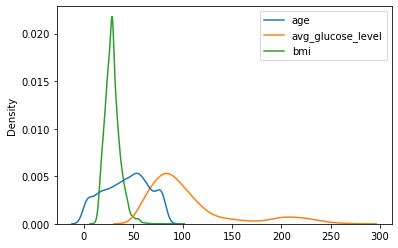

In [84]:
sns.kdeplot(data=df_num)

In [73]:
df_age = df[['age', 'stroke']]
df_avg_glucose_level = df[['avg_glucose_level', 'stroke']]
df_bmi = df[['bmi', 'stroke']]

df_age_stroke = df_age.loc[df_age['stroke'] == 1]
df_age_non_stroke = df_age.loc[df_age['stroke'] == 0]
df_avg_glucose_level_stroke = df_avg_glucose_level.loc[df_avg_glucose_level['stroke'] == 1]
df_avg_glucose_level_non_stroke = df_avg_glucose_level.loc[df_avg_glucose_level['stroke'] == 0]
df_bmi_stroke = df_bmi.loc[df_bmi['stroke'] == 1]
df_bmi_non_stroke = df_bmi.loc[df_bmi['stroke'] == 0]

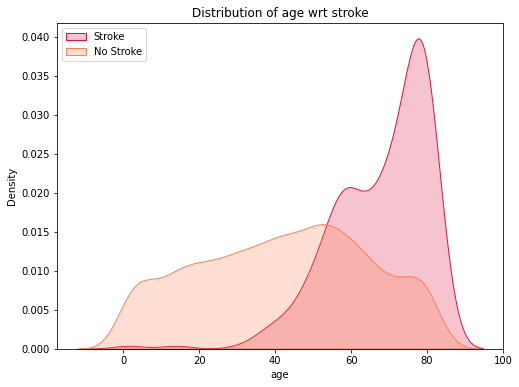

In [80]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(1,1)
# adding figures
ax = fig.add_subplot(gs[0,0])
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
plt.title('Distribution of age wrt stroke')
sns.kdeplot(ax=ax,x=df_age_stroke['age'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax,x=df_age_non_stroke['age'],color='coral',label='No Stroke',shade=True)
ax.legend(loc = 'upper left')
plt.show()


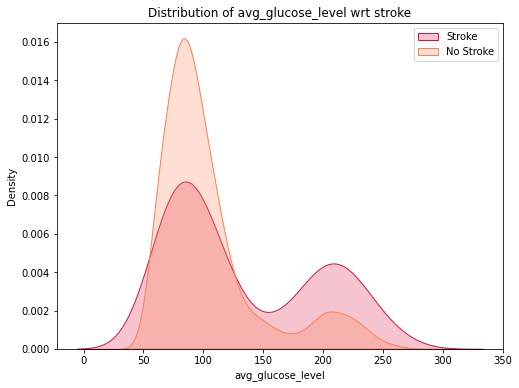

In [81]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
plt.title('Distribution of avg_glucose_level wrt stroke')
sns.kdeplot(ax=ax,x=df_avg_glucose_level_stroke['avg_glucose_level'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax,x=df_avg_glucose_level_non_stroke['avg_glucose_level'],color='coral',label='No Stroke',shade=True)
ax.legend(loc = 'upper right')
plt.show()

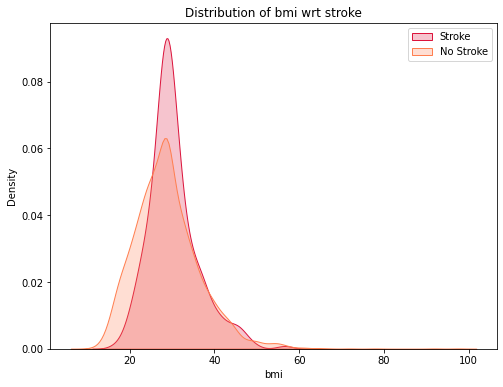

In [82]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
plt.title('Distribution of bmi wrt stroke')
sns.kdeplot(ax=ax,x=df_bmi_stroke['bmi'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax,x=df_bmi_non_stroke['bmi'],color='coral',label='No Stroke',shade=True)
ax.legend(loc = 'upper right')
plt.show()